# GAN_2D_Example

In [156]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable

## Prepare Data

Text(0,0.5,'y1')

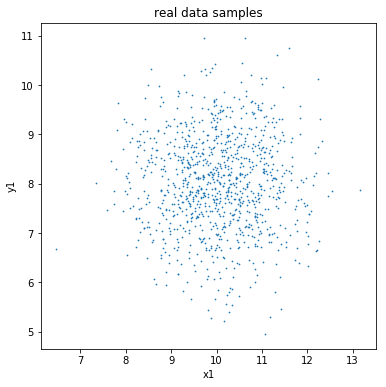

In [157]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define VAE model

In [166]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.cuda()
G.cuda()

Sequential(
  (0): Linear(in_features=10, out_features=20)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=2)
)

## Training GAN Model

In [167]:
batch_size = 300

#a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    x_gen = G(z).data
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [168]:
max_epoch = 100000

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 5.0762, g_loss: 0.6967, D(x): 0.01, D(G(z)): 0.50


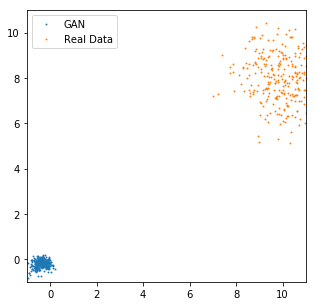

mean=
-0.3907
-0.2028
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 0.2412
 0.1855
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [500/100000], d_loss: 2.2068, g_loss: 0.6097, D(x): 0.24, D(G(z)): 0.54


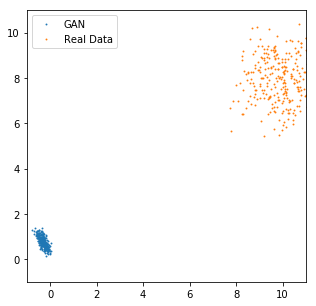

mean=
-0.3153
 0.7748
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 0.1444
 0.2401
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [1000/100000], d_loss: 1.2587, g_loss: 0.5376, D(x): 0.68, D(G(z)): 0.59


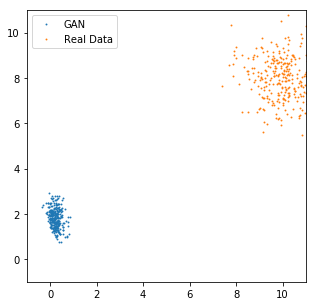

mean=
 0.2218
 1.8137
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 0.1901
 0.4236
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [1500/100000], d_loss: 1.2515, g_loss: 0.4691, D(x): 0.77, D(G(z)): 0.63


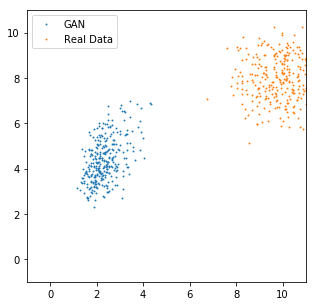

mean=
 2.3359
 4.3877
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 0.5933
 0.9736
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [2000/100000], d_loss: 1.3121, g_loss: 0.5176, D(x): 0.67, D(G(z)): 0.60


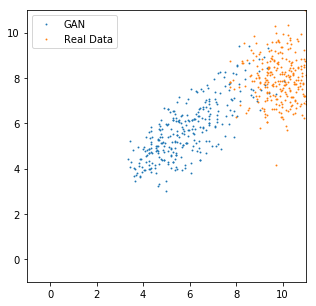

mean=
 5.9083
 5.7358
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 1.4878
 1.3322
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [2500/100000], d_loss: 1.3995, g_loss: 0.5818, D(x): 0.56, D(G(z)): 0.56


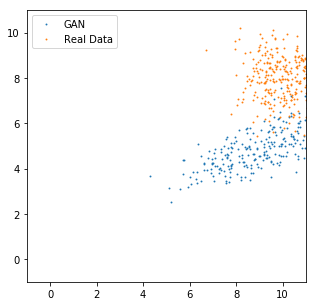

mean=
 9.7423
 5.1285
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.2148
 1.0519
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [3000/100000], d_loss: 1.3858, g_loss: 0.6908, D(x): 0.50, D(G(z)): 0.50


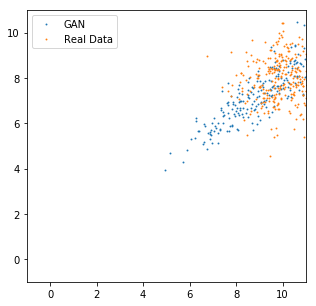

mean=
 10.1710
  8.0432
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.4694
 1.8081
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [3500/100000], d_loss: 1.3724, g_loss: 0.7344, D(x): 0.49, D(G(z)): 0.48


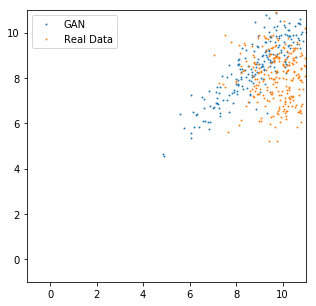

mean=
 10.0017
  9.4814
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.2146
 2.0421
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [4000/100000], d_loss: 1.3727, g_loss: 0.7300, D(x): 0.49, D(G(z)): 0.48


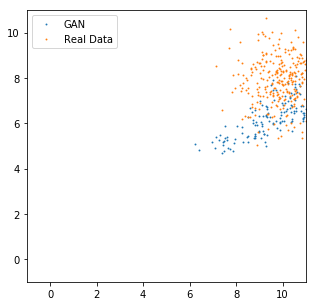

mean=
 11.8434
  7.5785
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.8519
 1.6742
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [4500/100000], d_loss: 1.3741, g_loss: 0.7233, D(x): 0.49, D(G(z)): 0.48


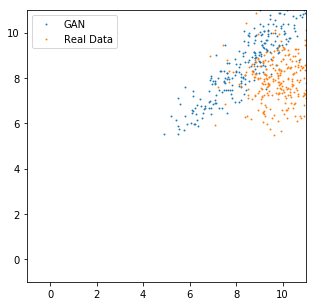

mean=
 9.1687
 9.3425
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.0338
 2.0358
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [5000/100000], d_loss: 1.3722, g_loss: 0.7138, D(x): 0.50, D(G(z)): 0.49


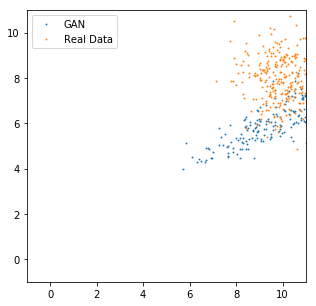

mean=
 11.2035
  6.9492
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.6950
 1.5926
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [5500/100000], d_loss: 1.3669, g_loss: 0.7030, D(x): 0.50, D(G(z)): 0.49


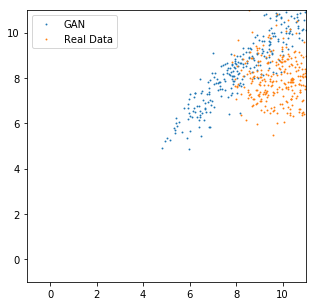

mean=
 8.7627
 8.9211
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 1.9347
 1.8678
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [6000/100000], d_loss: 1.3617, g_loss: 0.7085, D(x): 0.51, D(G(z)): 0.49


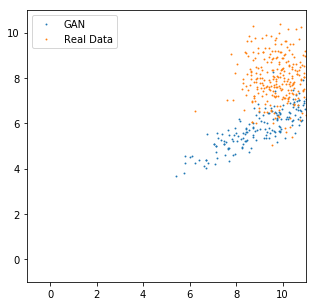

mean=
 10.9551
  6.8917
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.8519
 1.6613
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [6500/100000], d_loss: 1.3563, g_loss: 0.7057, D(x): 0.51, D(G(z)): 0.49


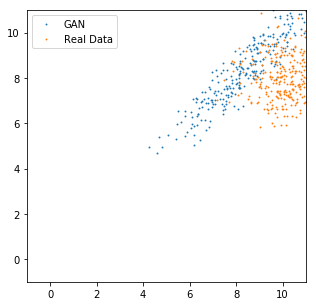

mean=
 9.0110
 8.9769
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.1525
 2.1323
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [7000/100000], d_loss: 1.3542, g_loss: 0.7143, D(x): 0.51, D(G(z)): 0.49


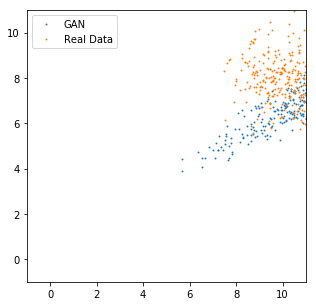

mean=
 11.1020
  7.2001
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.5104
 1.5846
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [7500/100000], d_loss: 1.3481, g_loss: 0.7097, D(x): 0.51, D(G(z)): 0.49


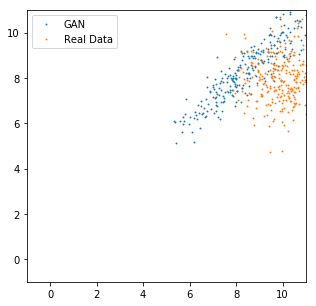

mean=
 9.0800
 8.9530
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 1.8821
 1.8138
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [8000/100000], d_loss: 1.3503, g_loss: 0.7147, D(x): 0.51, D(G(z)): 0.49


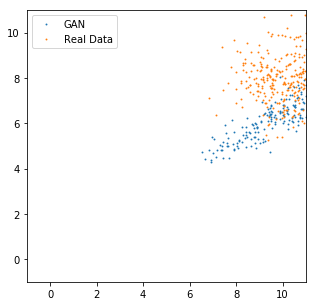

mean=
 11.0285
  7.0281
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.3645
 1.4402
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Epoch [8500/100000], d_loss: 1.3500, g_loss: 0.7134, D(x): 0.51, D(G(z)): 0.49


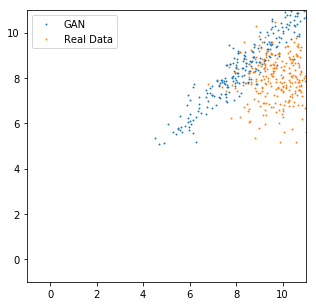

mean=
 9.1997
 9.3024
[torch.cuda.FloatTensor of size 2 (GPU 0)]
, std=
 2.1326
 2.0743
[torch.cuda.FloatTensor of size 2 (GPU 0)]



KeyboardInterrupt: 

In [169]:
for epoch in range(max_epoch):
    
    # Build mini-batch dataset
    x = Variable(sample_real(batch_size)).cuda()

    # Create the labels which are later used as input for the BCE loss
    real_labels = Variable(torch.ones(batch_size,1)).cuda()
    fake_labels = Variable(torch.zeros(batch_size,1)).cuda()


    #============= Train the discriminator =============#
    # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second term of the loss is always zero since real_labels == 1    
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    # First term of the loss is always zero since fake_labels == 0    
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    #=============== Train the generator ===============#
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z)
    outputs = D(fake_images)

    # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
#         print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.data[0], g_loss.data[0], real_score.data.mean(), fake_score.data.mean()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
